This is an update from my previous two posts on uptake and activity for the
[Julia programming language](https://julialang.org).

* [Julia in 2019]({filename}/hows-julia.ipynb);
* [Julia in 2020]({filename}/hows-julia-2020.ipynb).

As for the previous posts, the source for this document is a Jupyter Notebook:
`hows-julia-2021.ipynb` notebook. Get the notebook from [Github repository of
this blog](https://github.com/matthew-brett/asterisk-blog).

## Summary

As for the previous posts, I collected time-series data from the Julia language
repository commits, proportion of Github PRs, and two language ranking sites.

There are signs of a moderate uptick of web searches for Julia in mid 2020 /
2021, but a suggestion that activity may have dropped off in the last few
months.  Julia main repository activity has stayed pretty flat, as have the
Julia Github PR percentages.  It still does not look as if Julia is growing
fast enough to be a significant medium-term competitor to Python in data
science.

The subheading below match those from the previous posts.  See those posts for more detail on methods.

## Health of the Julia repository

This is an update on the health of the code repository for the Julia language
and its standard libraries.

In [1]:
from collections import Counter
import datetime as dt
import itertools

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

As for the previous posts, I analyzed commits of the [Julia Language repository](https://github.com/JuliaLang/julia) using some [code by Thomas Caswell](https://gist.github.com/tacaswell/e95cb2d57ca3783ffc40).

There's a copy of the commit data in `julia_commits_current.csv` in
[downloads/julia_commits_curent.csv](../downloads/julia_commits_current.csv).

In [2]:
commits = pd.read_csv('downloads/julia_commits_current.csv', sep='&')

The previous post had a plot of contributors ordered by their number of commits against the cumulative number of commits, as an index of breadth of contribution.  See that post for code to replicate that plot with the data here.  It has not changed much since the 2020 analysis.

The next figure is a plot of the number of commits and number of committers per week:

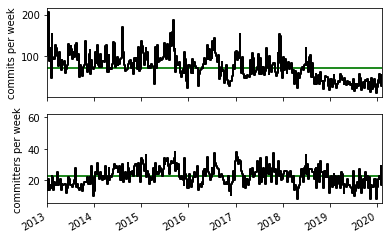

In [3]:
def stats_plotter(ax, left_edges, unq_by_week, col, ylabel):
    ln, = ax.step(left_edges,
                  unq_by_week[col], color='k', where='post', lw=2)

    hln = ax.axhline(unq_by_week[col].mean(), color='forestgreen', zorder=0, lw=2)
    ax.set_ylabel(ylabel)
    return ln, hln


def by_window_binner(ax1, ax2, commits, start, stop, step, window_name):
    edges = np.arange(start, stop + step, step)
    left_edges = [dt.datetime.fromtimestamp(t) for t in edges[:-1]]

    gb = commits.groupby(pd.cut(commits['time'], edges))
    unq_by_bin = gb.agg(lambda x: len(set(x)))

    stats_plotter(ax1, left_edges, unq_by_bin, 'time', 'commits per {}'.format(window_name))
    stats_plotter(ax2, left_edges, unq_by_bin, 'name', 'committers per {}'.format(window_name))

start = dt.datetime(2013, 1, 1).timestamp()
stop = dt.datetime(2021, 6, 11).timestamp()

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
by_window_binner(ax1, ax2, commits, start, stop, 7*24*60*60, 'week')
ax1.set_xlim((dt.datetime(2013, 1, 1), dt.datetime(2020, 2, 7)))
fig.autofmt_xdate()

Julia's development continues at a steady rate of around 40 commits per week
since the [first release in August
2018](https://julialang.org/blog/2018/08/one-point-zero).

## Percentage of all Github pull requests

This is an update of the proportion of Github Pull Requests that are in the
Julia language, and others, from data scraped by hand from the [Githut 2.0
site](https://madnight.github.io/githut).  The latest version of these data is
[this link](../downloads/julia_gh_prs_current.csv)

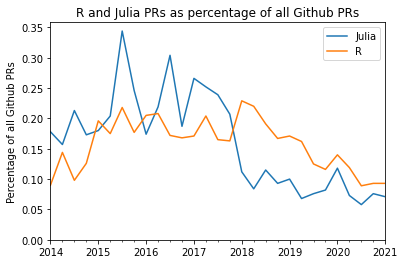

In [4]:
julia_prs = pd.read_csv('downloads/julia_gh_prs_current.csv')
julia_prs['Month'] = (julia_prs['Quarter'] - 1) * 3 + 2
datish = julia_prs.apply(
    lambda x: f"{x['Year']:0.0f}-{x['Month']:0.0f}", axis=1)
julia_prs.index = pd.to_datetime(datish)
end = dt.datetime(2021, 6, 1)
jprs = julia_prs.loc[julia_prs.index <= end]
ax = jprs.plot(y='Julia', use_index=True)
jprs.plot(y='R', use_index=True, ax=ax)
plt.title("R and Julia PRs as percentage of all Github PRs")
plt.ylabel('Percentage of all Github PRs')
plt.ylim(0);

Julia's numbers have been steady at about 0.1% since 2019.

For comparison, here are the values for Python, R and Julia for the last two years:

In [5]:
jprs.head(4)[['Python', 'R', 'Julia']]

,Python,R,Julia
2021-02-01,16.628,0.093,0.071
2020-11-01,16.488,0.093,0.076
2020-08-01,15.873,0.089,0.058
2020-05-01,16.108,0.119,0.073


## TIOBE language index

The values here come from [archive.org
copies](https://web.archive.org/web/*/https://www.tiobe.com/tiobe-index/) of
<https://www.tiobe.com/tiobe-index>.

The data file with the index values is
[downloads/julia_tiobe_current.csv](../downloads/julia_tiobe_current.csv).

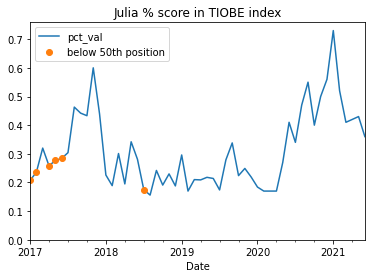

In [6]:
julia_tiobe = pd.read_csv('downloads/julia_tiobe_current.csv')
julia_tiobe['pct'] = julia_tiobe['pct'].apply(lambda x : x.strip())
julia_tiobe['pct_val'] = julia_tiobe['pct'].apply(
    lambda x : float(x[1:] if x.startswith('<') else x))
julia_tiobe.index = pd.to_datetime(julia_tiobe['year_month'])
jtio = julia_tiobe.loc[julia_tiobe.index <= end]
ax = jtio.plot(y='pct_val', use_index=True)
belows = jtio[jtio['pct'].apply(lambda x : x.startswith('<'))]
belows.plot(y='pct_val', use_index=True,
            style='o', label='below 50th position', ax=ax)
plt.title('Julia % score in TIOBE index')
plt.xlabel('Date')
plt.ylim(0);

As a reminder, the TIOBE index derives from [counts of search index
hits](https://www.tiobe.com/tiobe-index/programming-languages-definition) for
particular languages.

The graph shows a moderate uptick in the Julia percent score from mid 2020.The
latest percentages are are down around 0.4 from the peak of 0.7 at the end of
2020, and there's some suggestion from the month-to-month variation that the
peak, and the subsequent moderate drop, are a little outside the noise.  It
seems reasonble to conclude that there has been a moderate increase in web
searches related to Julia.

## Redmonk Programming Language Rankings / Stack Overflow

It is difficult to know where Julia is in the [Redmonk
ratings](https://redmonk.com/sogrady/category/programming-languages).  The
rankings only list the top 20 languages, and Julia is not in the top 20. The
[June 2020
rankings](https://redmonk.com/sogrady/2020/07/27/language-rankings-6-20) note
Julia at +0 change, but it's not clear where it was previously.  The [January
2021] ratings](https://redmonk.com/sogrady/2021/03/01/language-rankings-1-21/)
don't mention Julia in the text.

Some data for the Redmonk rankings come from [Stack Overflow
data](https://insights.stackoverflow.com/trends).  Here is an update of the
percentage of Stack Overflow questions on Julia:

![SO Julia](images/so_julia_2021-06.png)

This graphic is a screen shot from the [PopularitY of Programming
Languages](https://pypl.github.io/PYPL.html) website:

![](images/pypl_2021-06.jpg)

Notice the logarithmic scale.  This plot seems to reflect the uptick we saw in
the TIOBE index.  The PYPL site notes that "The raw data comes from Google
Trends.", so PYPL is probably looking at the same data as TIOBE (above).